# Полиномиальная регрессия в Scikit-Learn
---
Полиномы могут решить две задачи:
* Смоделировать нелинейные связи между отдельным признаком и целевой переменной
* Добавить взаимодействие(зависимости) между отдельными признаками

Начнем с первой задачи, когда признак не является линейным:

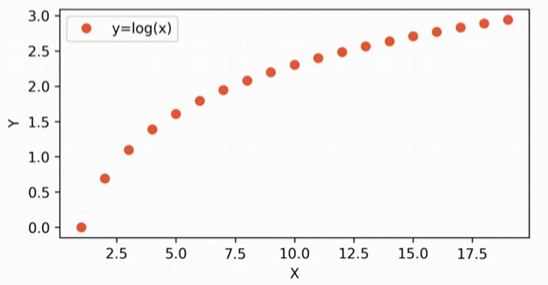

Как мы можем описать такой набор точек с помощью модели? Прямая линия нам не подойдет, так как точки не лежат на одной прямой. Мы можем помотреть на квадарт логарифма, и получить что-то приближенное к прямой линии:

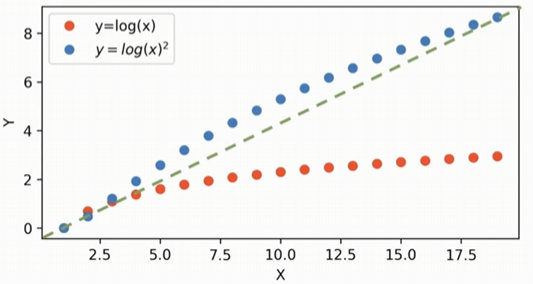

Или для третей степени:

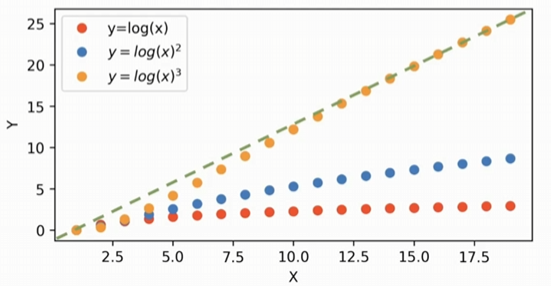

Для таких точек нам будет уже проще найти коэффициенты $\beta$.

**Важно: далеко не каждый признак будет похож на полином более выского порядка!** Основная мысль заключается в том, что при поиске коэффициентов $\beta$ в линейном уравнении можно брать не только сами признаки, но и степени этих признаков.

**Что делать, когда один признак важен, только когда важен и другой признак?**  
Простейший способ - добавить произведение двух признаков(interaction term), в дополнение к каждому из признаков в отдельности, т.е. мы учитываем как каждый признак в отдельности, так и их взаимодействие между собой. В Scikit-Learn это можно сделать с помощью методов **preprocessing**.

В случае двух признаков A и B:$$1, A, B, A^2, AB, B^2$$

Общая форма для двух признаков $x_1$ и $x_2$:$$1, x_1, x_2, x^2_1, x_1x_2, x^2_2$$

Пример - если $x_1 = 2$ и $x_2 = 3$:$$1, 2, 3, 4, 6, 9$$

Для всех этих шести признаков нужно будет искать коэффициенты $\beta$. Эти коэффициенты смогут найти больше сигналов в данных, например если признаки связаны между собой или связь не является линейной. Однако, никто не гарантирует, что произведение признаков или более высокие степени признаков несут в себе какие-либо полезные сигналы.

---
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Берём все колонки, КРОМЕ sales
X = df.drop('sales', axis=1)

In [4]:
y=df['sales']

## Полиномиальная регрессия
**Прежде всего импортируем из Preprocessing класс PolynomialFeatures. С его помощью трансформируем исходные данные, добавляя в них полиномиальные признаки.**

Перейдём от уравнения в следующей форме (здесь показан случай, когда у нас только один признак x):

$$\hat{y} = \beta_0 + \beta_1x_1 + \epsilon $$

и добавим дополнительные признаки на основе исходного признака x для полинома некоторой степени *d*.

$$\hat{y} = \beta_0 + \beta_1x_1 + \beta_1x^2_1 +  ... + \beta_dx^d_1 + \epsilon$$

Далее применим линейную регрессию, поскольку по сути можем воспринимать эти полиномиальные признаки $x^2, x^3, ... x^d$ как новые признаки. Нужно аккуратно выбрать правильное значение *d*, степень модели. С этим могут помочь метрики оценки модели.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

Параметры PolynomialFeatures:
* `degree` - до какой максимальной степени создавать полиномы
* `interaction_only` - хотим ли добавить только слагаемые interaction term - произведение признаков
* `include_bias` - постоянная константа, значение целевой переменной в том случае, когда все признаки равны нулю, если бы этой константы не было, то при нулевых признаках, целевая переменная тоже была бы равна нулю(т.е. это своего рода смещение относительно нуля для целевой переменной). Наличие константы зависит от контекста задачи.

In [11]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

**Метод Converter "обучается" на данных, в данном случае, на основе всех колонок X, затем этот метод выполняет трансформацию и выдаёт на выходе новые полиномиальные данные**

In [31]:
# Мы не разбиваем признаки на train и test, т.к.
# это ещё не обучение модели
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [33]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [35]:
polynomial_converter.transform(X).shape

(200, 9)

Метод transform() класса PolynomialFeatures преобразует датафрейм, создавая на основе исходных признаков полиномиальные признаки. При этом увеличивается количество колонок - в данном примере на входе в датафрейме X было 3 колонки, а на выходе transform(X) стало 9 колонок.

Зачем нужны отдельно fit() и отдельно transform()? Казалось бы, можно объединить их в единый метод. Да, можно - и такой метод есть, называется fit_transform(). Но идея разделить эти два метода, и запускать их отдельно, состоит в следующем. В этапе обучения модели мы "обучаем" различные компоненты - как саму модель, так и другие компоненты, например создание полиномиальных признаков, чуть позже появится масштабирование и т.д. Для всех этих объектов, этап обучения разумно выполнять методом, который для единообразия называется одинаково - fit().  А дальше - уже после обучения - мы будем применять все эти шаги к совершенно новым данным, которые модель никогда не видела. На этом этапе мы уже не будем запускать метод fit() ни для полиномиальных признаков, ни для модели, а будем запускать только метод transform() для создания полиномиальных признаков, и только метод predict() для модели.

Мы получаем на выходе девять колонок, так как в исходном датафрейме у нас было 3 колонки и после метода `transform` мы получаем то же самое количество строк - 200, а количество колонок увеличилось так как мы перешли от трех признаков к девяти. Первые три признака - наши исходные, следующие три числа - это слагаемые interaction terms, последние три - квадраты исходных признаков.

In [38]:
poly_features = polynomial_converter.transform(X)

In [40]:
poly_features.shape

(200, 9)

In [42]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [44]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [46]:
230.1 * 37.8

8697.779999999999

In [48]:
37.8 * 69.2

2615.7599999999998

In [50]:
230.1 * 69.2

15922.92

In [54]:
poly_features[0][:3]

array([230.1,  37.8,  69.2])

In [52]:
poly_features[0][:3]**2

array([52946.01,  1428.84,  4788.64])

In [13]:
poly_features = polynomial_converter.fit_transform(X)

In [15]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [58]:
pd.DataFrame(poly_features, columns=polynomial_converter.get_feature_names_out(X.columns))

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56
...,...,...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,1459.24,141.34,527.16,13.69,51.06,190.44
196,94.2,4.9,8.1,8873.64,461.58,763.02,24.01,39.69,65.61
197,177.0,9.3,6.4,31329.00,1646.10,1132.80,86.49,59.52,40.96
198,283.6,42.0,66.2,80428.96,11911.20,18774.32,1764.00,2780.40,4382.44


**По шагам:**
* Импортируем `PolynomialFeatures`
* Создаем `polynomial_converter` с нужной степенью `degree`
* С помощью `fit_transform` преобразуем исходный набор признаков в расширенный набор

## Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [18]:
from sklearn.model_selection import train_test_split

**Мы будем выполнять обучение не на признаках X, потому что это всего три признака, вместо этого нам нужна переменная *poly_features* с девятью признаками.**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

## Модель для обучения на полиномиальных данных
#### Создаем экземпляр модели с параметрами

In [27]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

## Обучаем модель на обучающих данных

In [32]:
model.fit(X_train, y_train)

LinearRegression()

## Оценка работы модели на тестовых данных
#### Вычисляем производительность на тестовых данных
Чтобы корректно оценить работу модели, мы вычисляем метрики на тестовом наборе данных (это те данные, которые модель никогда не видела в процессе обучения).

In [35]:
test_predictions = model.predict(X_test)

In [37]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
MAE = mean_absolute_error(y_test, test_predictions)

In [43]:
MSE = mean_squared_error(y_test, test_predictions)

In [45]:
RMSE = np.sqrt(MSE)

In [47]:
MAE

0.5905974833808129

In [49]:
MSE

0.5231944949055536

In [51]:
RMSE

0.7233218473857634

### Сравнение с простой линейной регрессией
Результаты на тестовом наборе данных (замечание: для правильного сравнения следует использовать одно и то же разбиение данных на обучающую и тестовую выборки, а также одинаковый параметр `random_state`! В таком случае в обучающие и тестовые наборы данных попадают одни и те же строки для обеих моделей.)
* Поростая линейная регрессия:
  * MAE: 1.51
  * RMSE: 1.95
* Полиномиальная регрессия второй степени:
  * MAE: 0.59
  * RMSE: 0.72

In [56]:
pd.DataFrame([model.coef_], columns=polynomial_converter.get_feature_names_out(X.columns))

,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,0.054782,0.013112,0.010864,-0.000111,0.00108,-0.000108,0.000302,0.000175,0.000101


### Графики

In [62]:
y_hat = model.predict(poly_features)

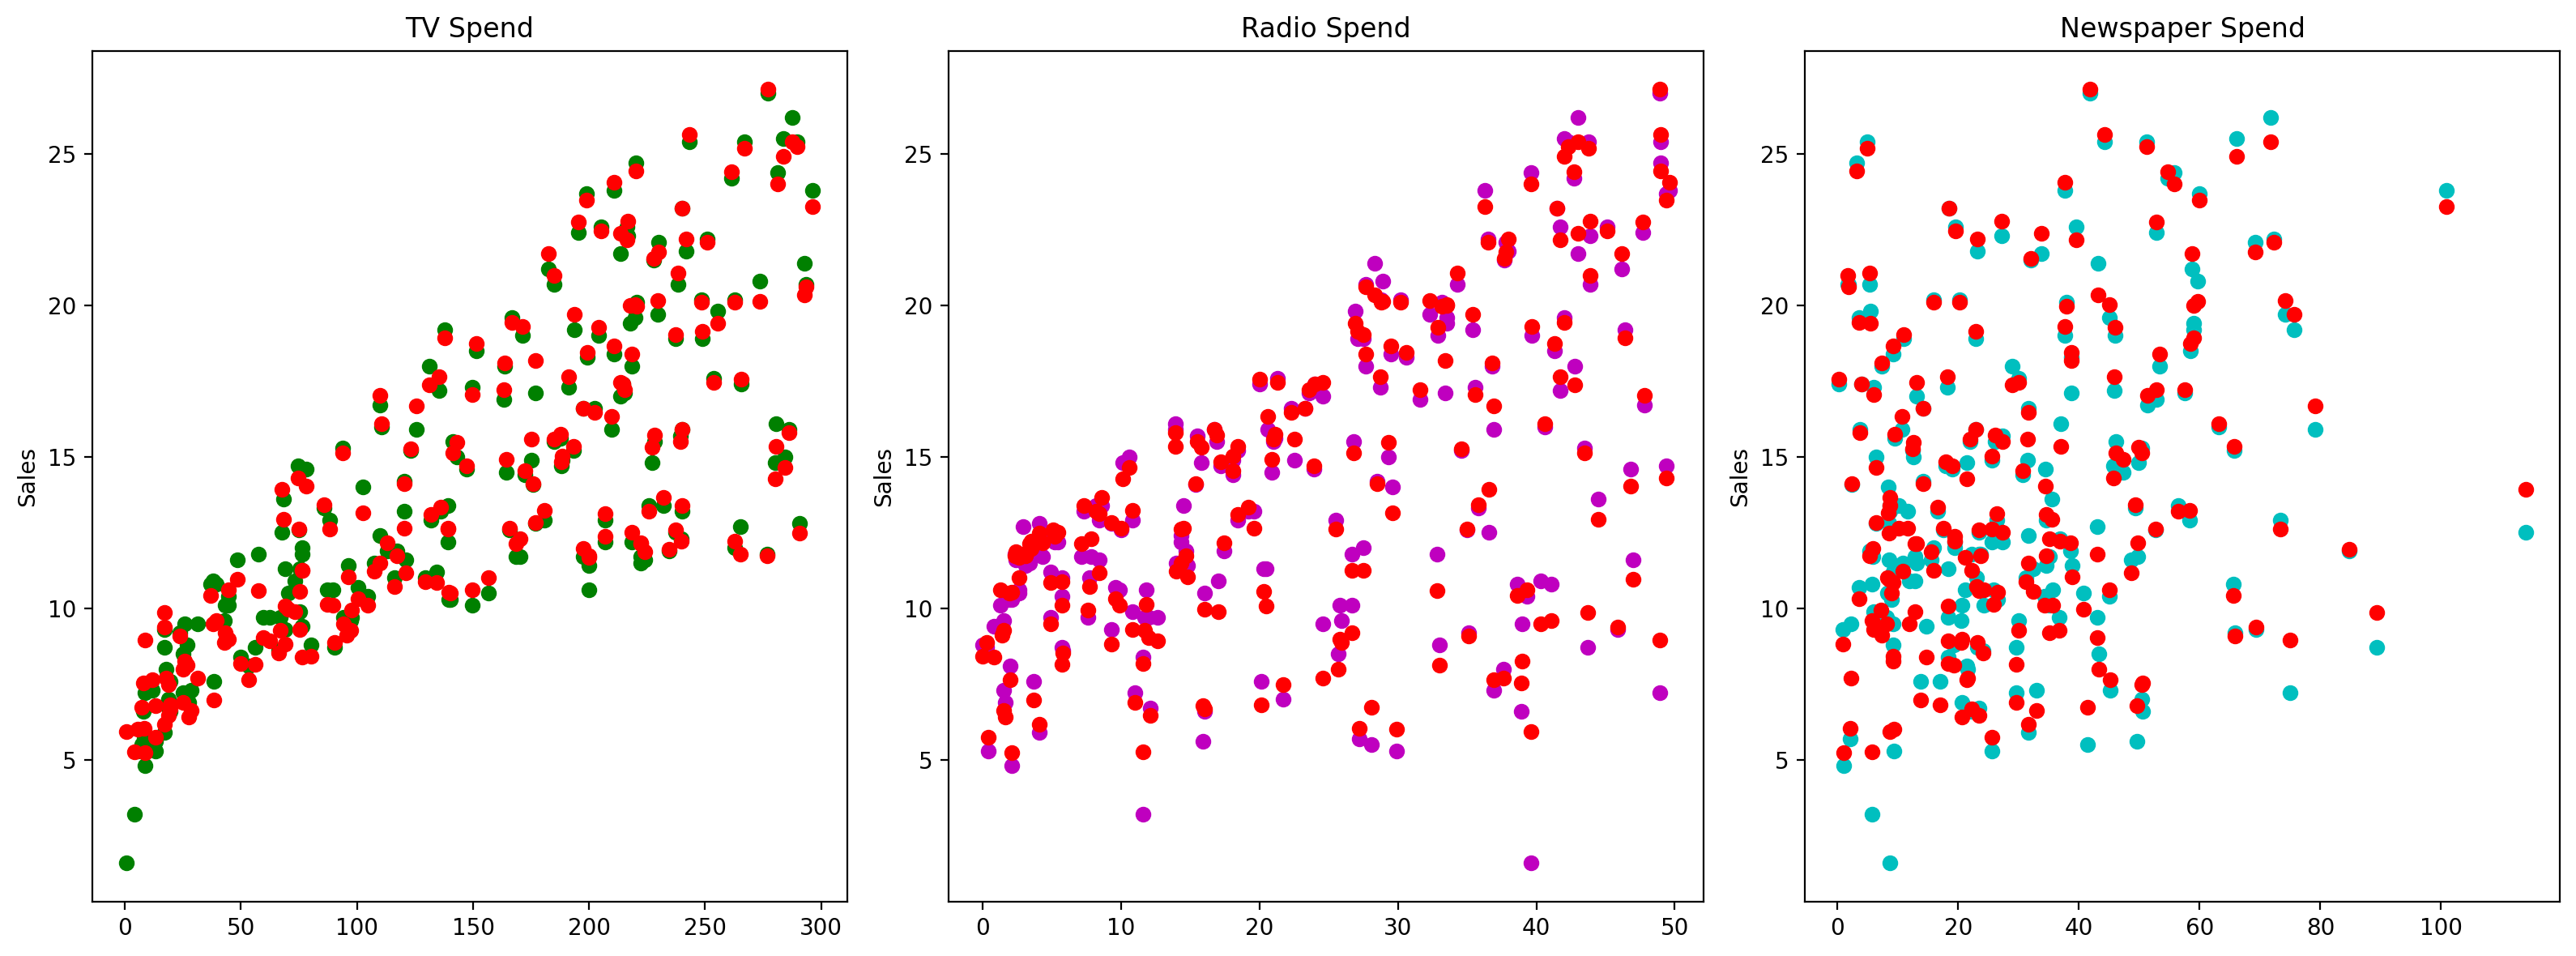

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6), dpi=200)

axes[0].plot(df['TV'], df['sales'], 'go')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'mo')
axes[1].plot(df['radio'], y_hat,'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'co')
axes[2].plot(df['newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper Spend')

plt.tight_layout()
plt.show()

In [67]:
residuals = y_hat - y

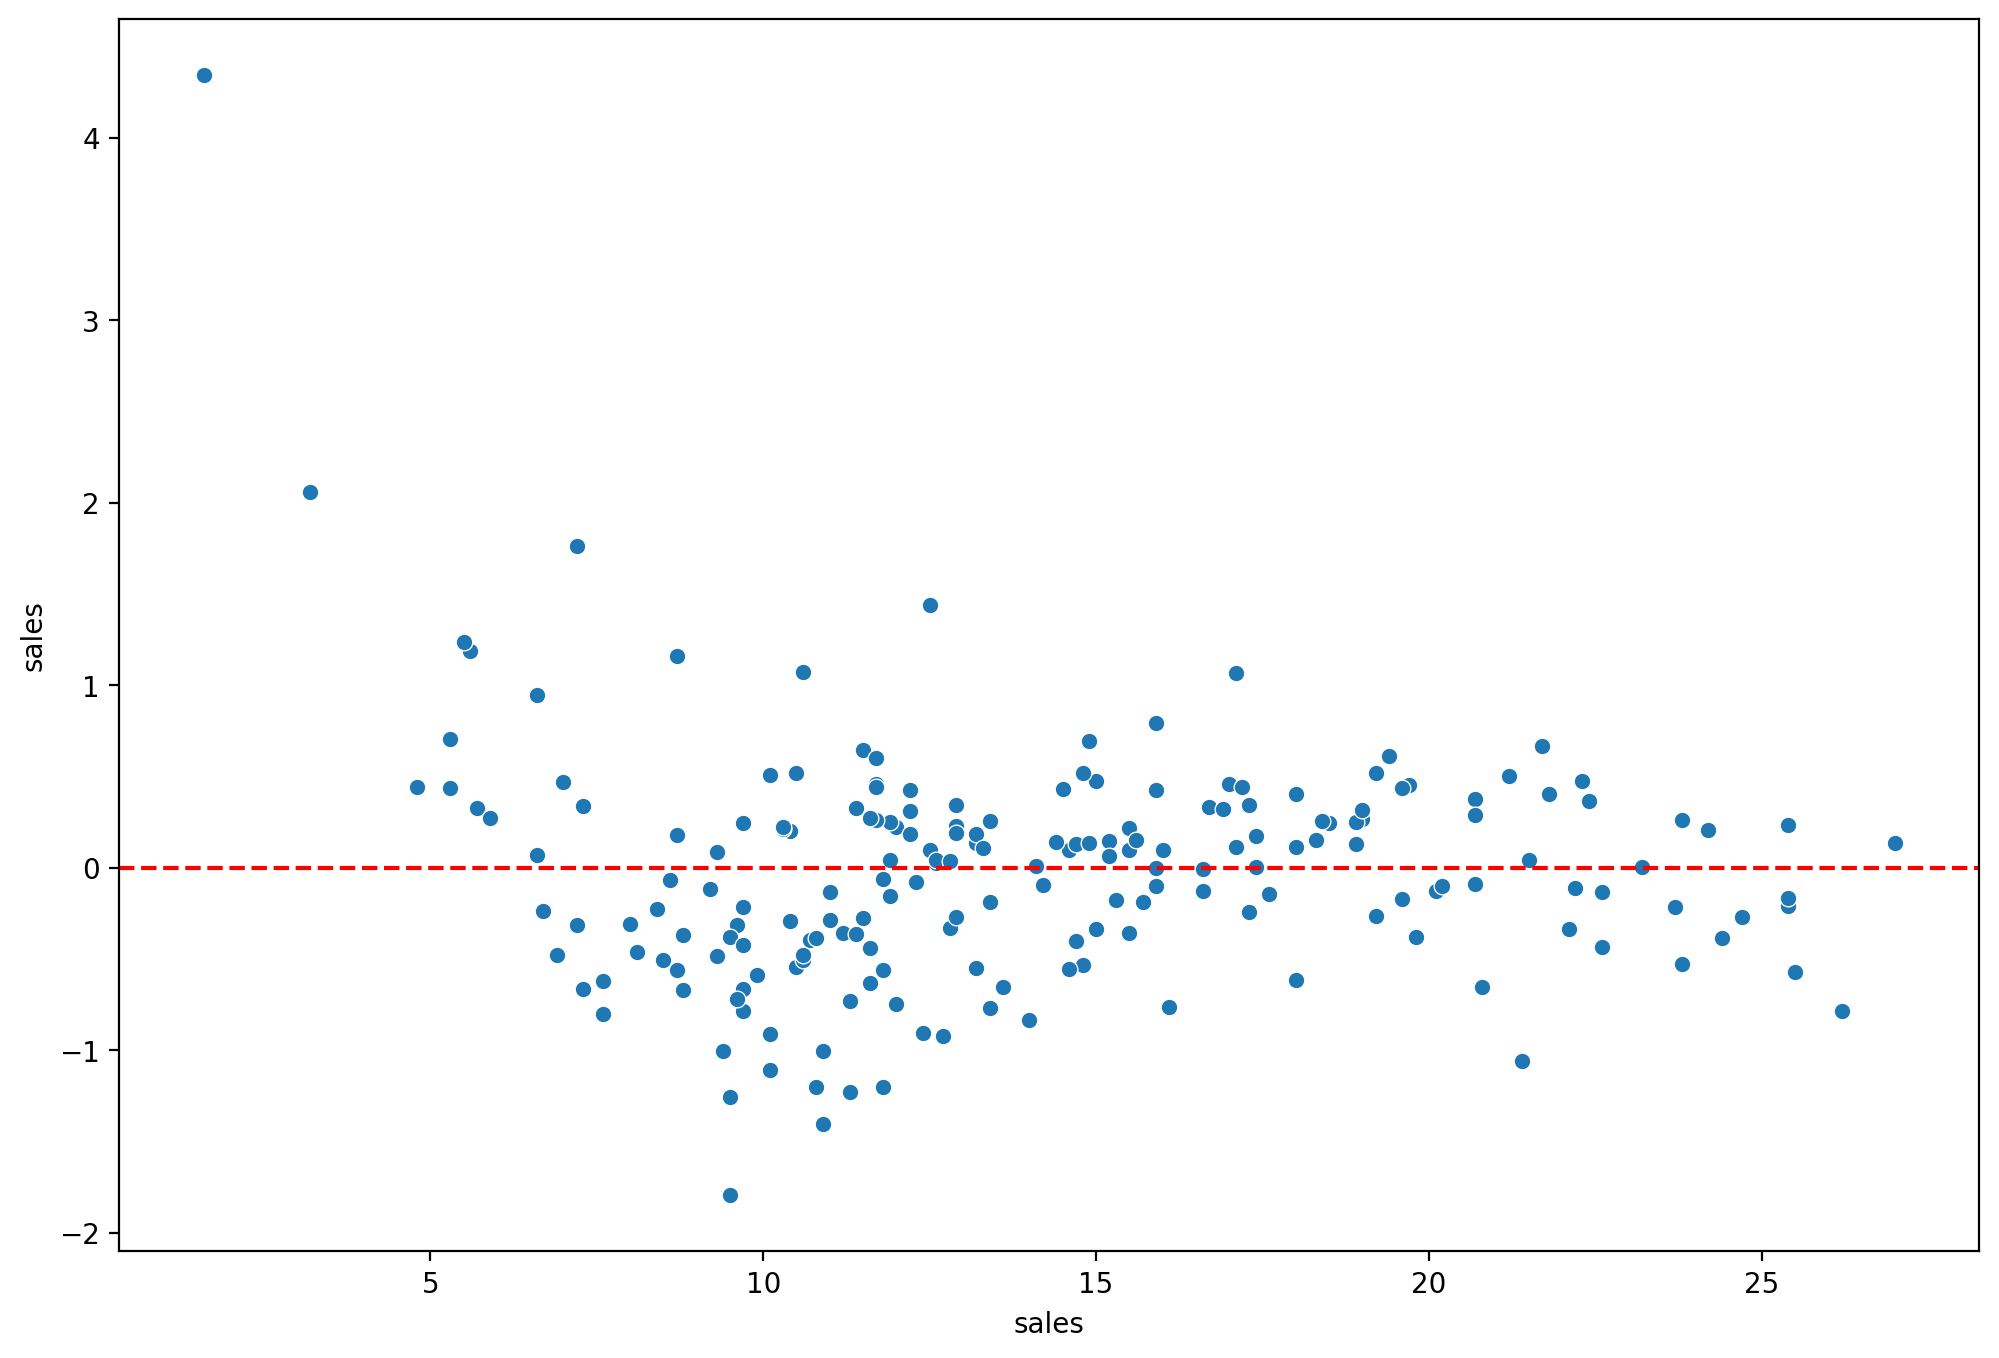

In [71]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

<Figure size 2400x1600 with 0 Axes>

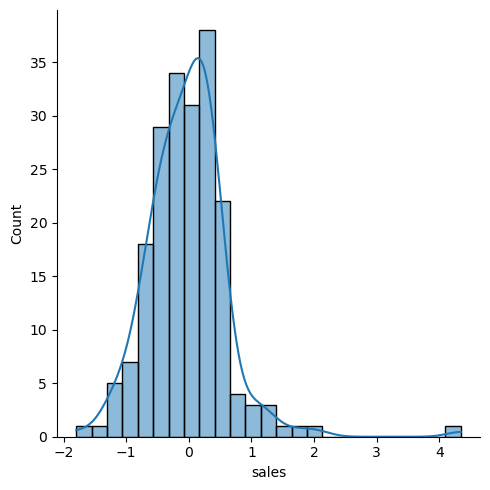

In [77]:
plt.figure(figsize=(12, 8), dpi=200)
sns.displot(data=residuals, bins=25, kde=True)
plt.show()

In [73]:
import scipy as sp

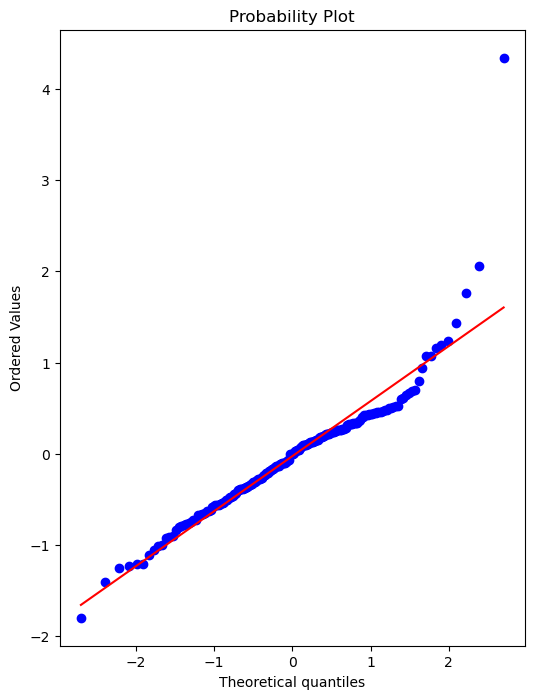

In [75]:
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8), dpi=100)

# probplot возвращает значения, которые можно использовать при необходимости
# мы хотим просто нарисовать график, поэтому присваиваем эти значения переменной _
_ = sp.stats.probplot(residuals, plot=ax)

---

# Дилемма смещения-дисперсии(Bias-Variance Trade-off) | недообучение vs переобучение
---
Как выбрать оптимальную степень полинома? Какие плюсы и минусы нужно учитывать, повышая сложность модели?

В общем случае усложнение модели приводит к дилемме смещения-дисперсии. Мы хотим получить такую модель, которая хорошо работает на новых неизвестных данных, а также которая хорошо объясняет известные данные.   
В таком случае надо соблюсти баланс между двумя случаями:
1) Большое сещение(bias) - недообучение(underfitting)
2) Большая дисперсия(variance) - переобучение(overfitting), здесь "пере-" означает "слишком"

**Оба случая - плохая модель!**

## Переобучение(overfitting)
Модель слишком точно повторяет шумы и неточности в данных. Это часто приводит к малым ошибкам на обучающем наборе данных, но к большим ошибкам на тестовых/проверочных данных.

Например, мы хотим построить модель, которая будет описывать следующие данные:

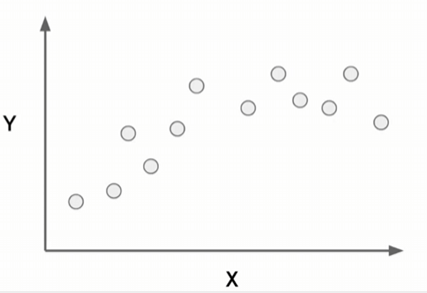

Хорошая модель будет выглядеть следующим образом:

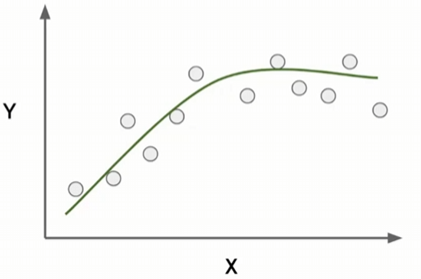

Переобученная модель будет выглядеть следующим образом:

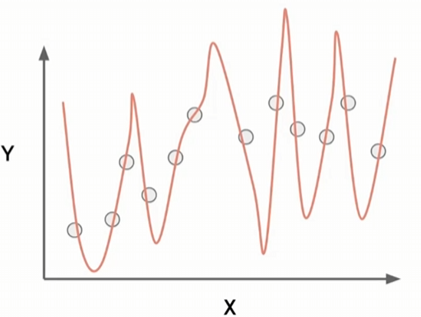

**Ошибки такой модели будут равны нулю!**

## Недообучение(underfitting):
Модель не описывает тренды в данных и недостаточно хорошо работает на обучающем наборе. Такой модели присущи малая дисперсия(variance) и большое смещение(bias). Как правило это говорит о том, что модель слишком простая.

Рассмотрим тот же самый пример, недообученная модель будет выглядеть следующим образом:

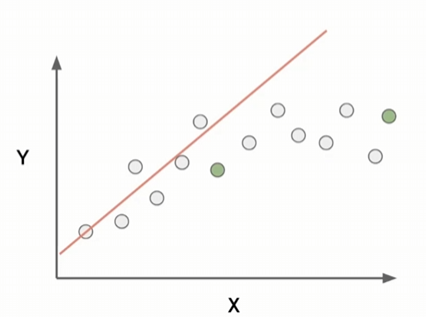

Такая модель имеет слишком большое смещение и слишком сильно обобщает данные. Обычно она показывает слабые результаты и на обучающем, и на тестовом наборе данных.

**Случай нудообученности модели легче обнаружить, чем случай переобученности в силу ее результатов.**

## Что делать если признаков много?
Представим, что мы обучили модель и затем измерили ошибки для разной сложности модели(степеней полинома). На графике ниже по горизонтали отложена сложность модели, а по вертикали - ошибка модели для той или иной сложности. Для хорошей модели, при увеличении сложности модели - ошибка должна падать(в идеальном случае):

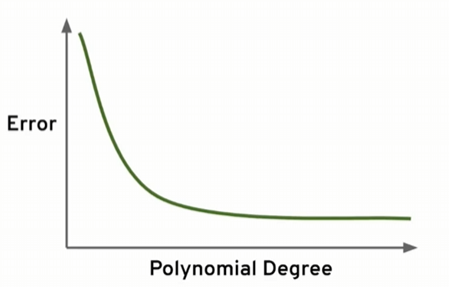

Для плохой модели - при увеличении сложности модели, ухудшается ее точность:

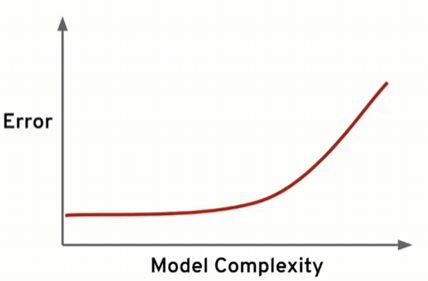

**При изучении недообученности и переобученности модели нужно смотреть на результаты модели на *обучающем наборе данных(training set)* сравнивая их с результатами на *тестовом наборе данных(test set)***

---

# Выбираем модель
---
## Подбор параметров
Нравится ли нам точность модели? Может быть, более высокая степень полинома ещё больше улучшит результаты? Но не будет ли так, что большие значения степени будут слишком большими? Посмотрим на дальнейшие степени полиномов, каждый раз смотря на ошибки предсказания. В итоге, придём к дискуссии про переобученность модели (overfitting).

С помощью цикла for сделаем следующее:
1) Создадим полиномиальные данные некоторой степени для данных X
2) Разобъём полиномиальные данные для обучающий и тестовый наборы данных
3) Выполним обучение модели на обучающем наборе данных
4) Посчитаем метрики на обучающем и тестовом наборе данных
5) Нанесём эти данные на график, чтобы увидеть момент переобучения модели

In [93]:
# Ошибка на обучающем наборе для той или иной степени полинома
train_rmse_errors = []
# Ошибка на тестовом наборе для той или иной степени полинома
test_rmse_errors = []

for d in range(1, 10):

    # Создаём полиномиальные данные для степени 'd'
    polynomial_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    # Разбиваем эти новые полиномиальные данные на обучающий и тестовый наборы данных
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

    # Обучаем модель на этом новом наборе полиномиальных данных
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Выполняем предсказание и на обучающем, и на тестовом наборе данных
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Вычисляем ошибки

    # Ошибки на обучающем наборе данных
    train_RMSE = np.sqrt(mean_squared_error(y_train, train_pred))

    # Ошибки на тестовом наборе данных
    test_RMSE = np.sqrt(mean_squared_error(y_test, test_pred))

    # Добавляем ошибки в список для последующего нанесения на график
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

In [95]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838923,
 0.46887581118220883,
 0.3694689701771525,
 0.24382206827180572,
 0.22508532130371506,
 0.23124903019549187,
 0.27901977960461066,
 0.593394458579907]

In [97]:
 test_rmse_errors

[1.9485372043446385,
 0.7233218473857634,
 0.5392350985572576,
 1.303226623749492,
 5.946670177318908,
 22.04417736858079,
 235.16269593479203,
 5089.6610738860345,
 10202.075061563744]

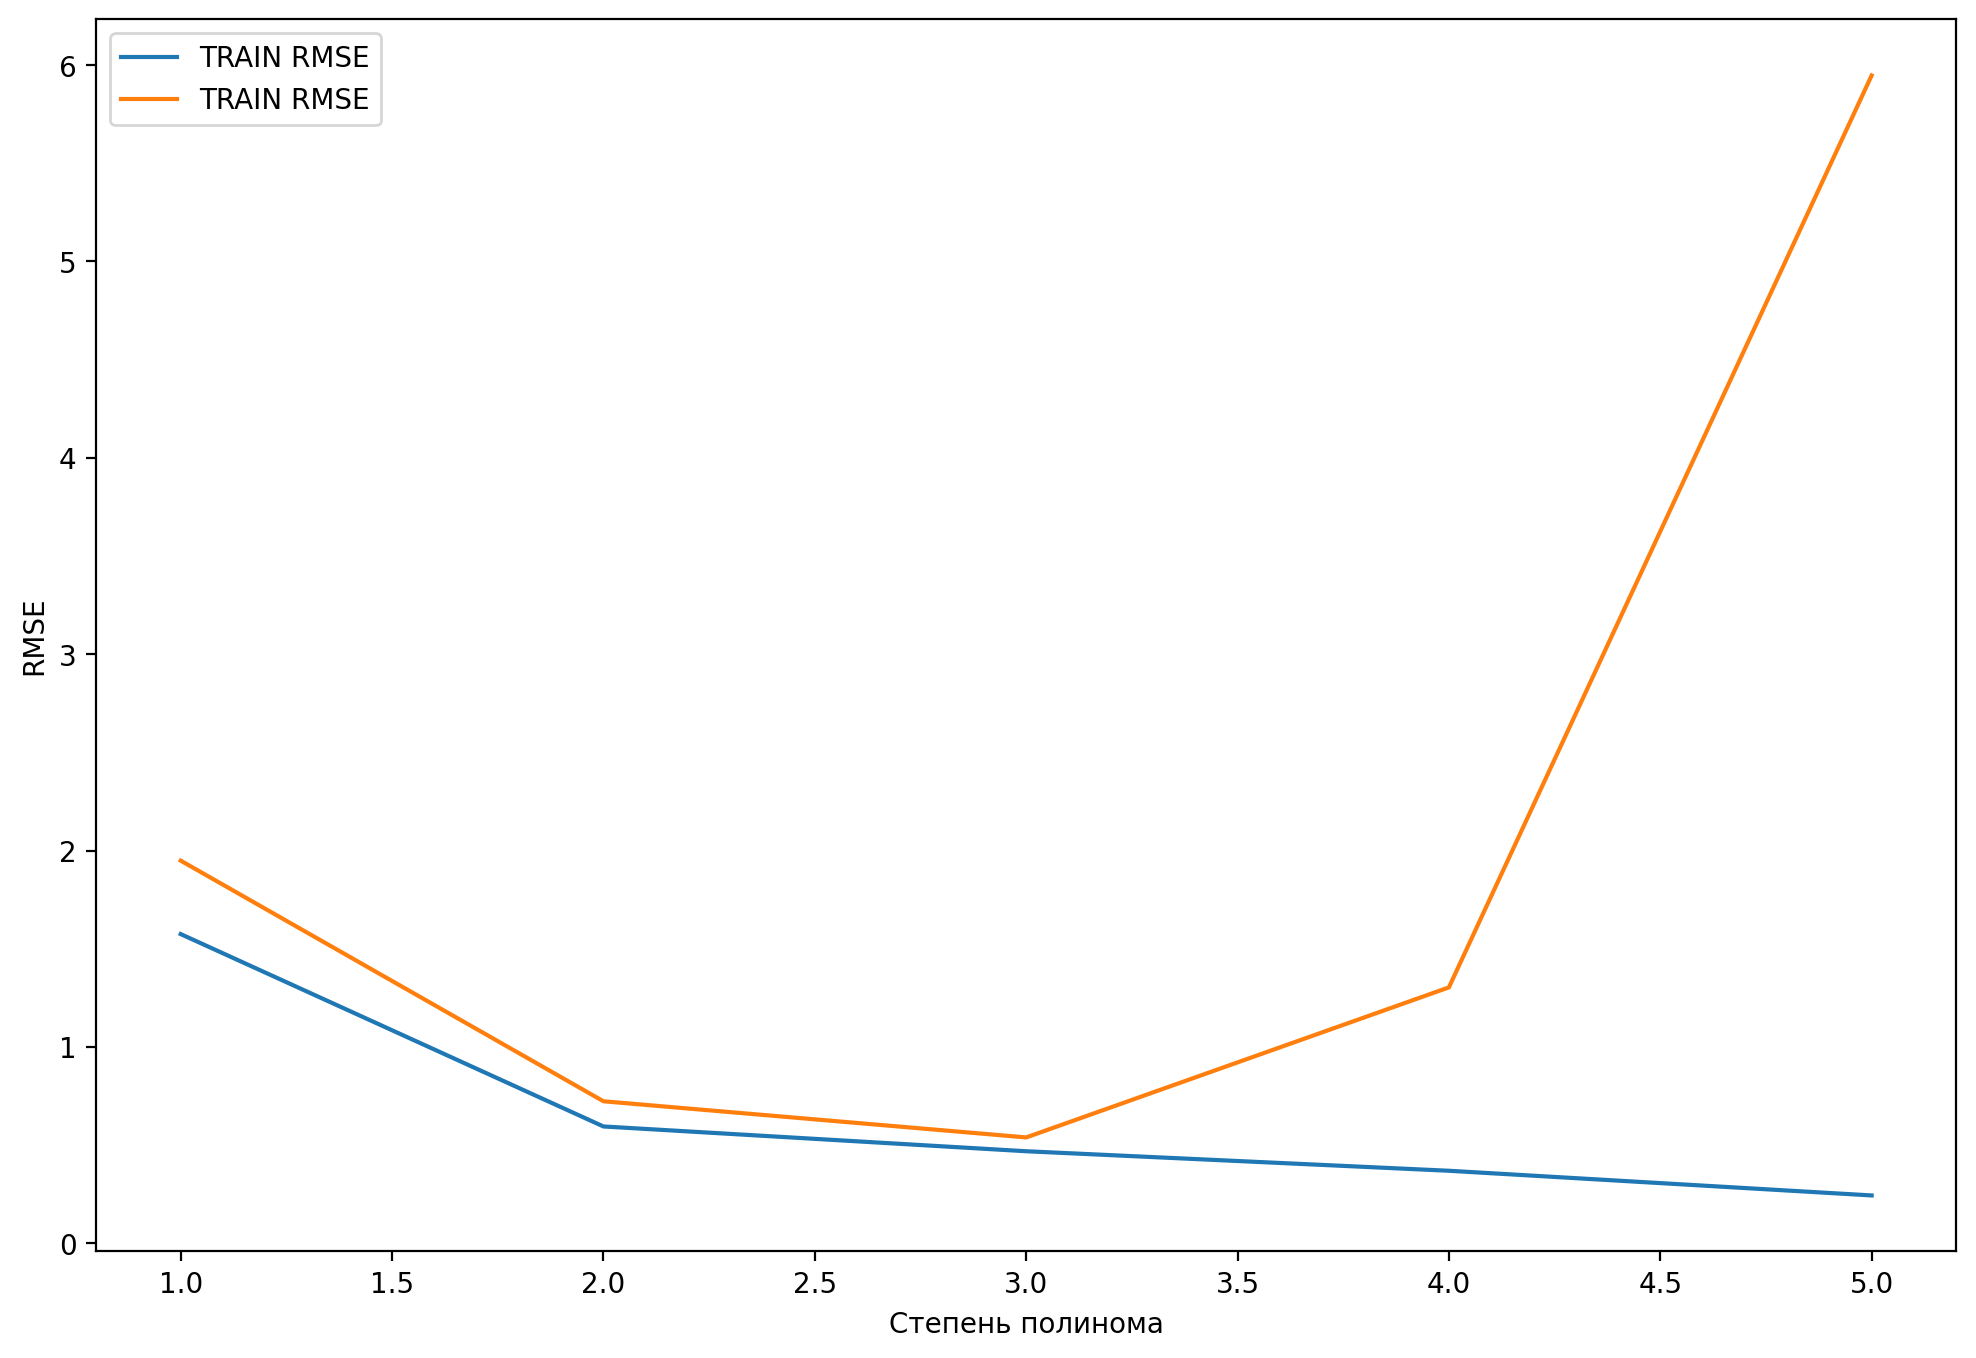

In [103]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(1, 6), train_rmse_errors[:5], label='TRAIN RMSE')
plt.plot(range(1, 6), test_rmse_errors[:5], label='TRAIN RMSE')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()
plt.show()

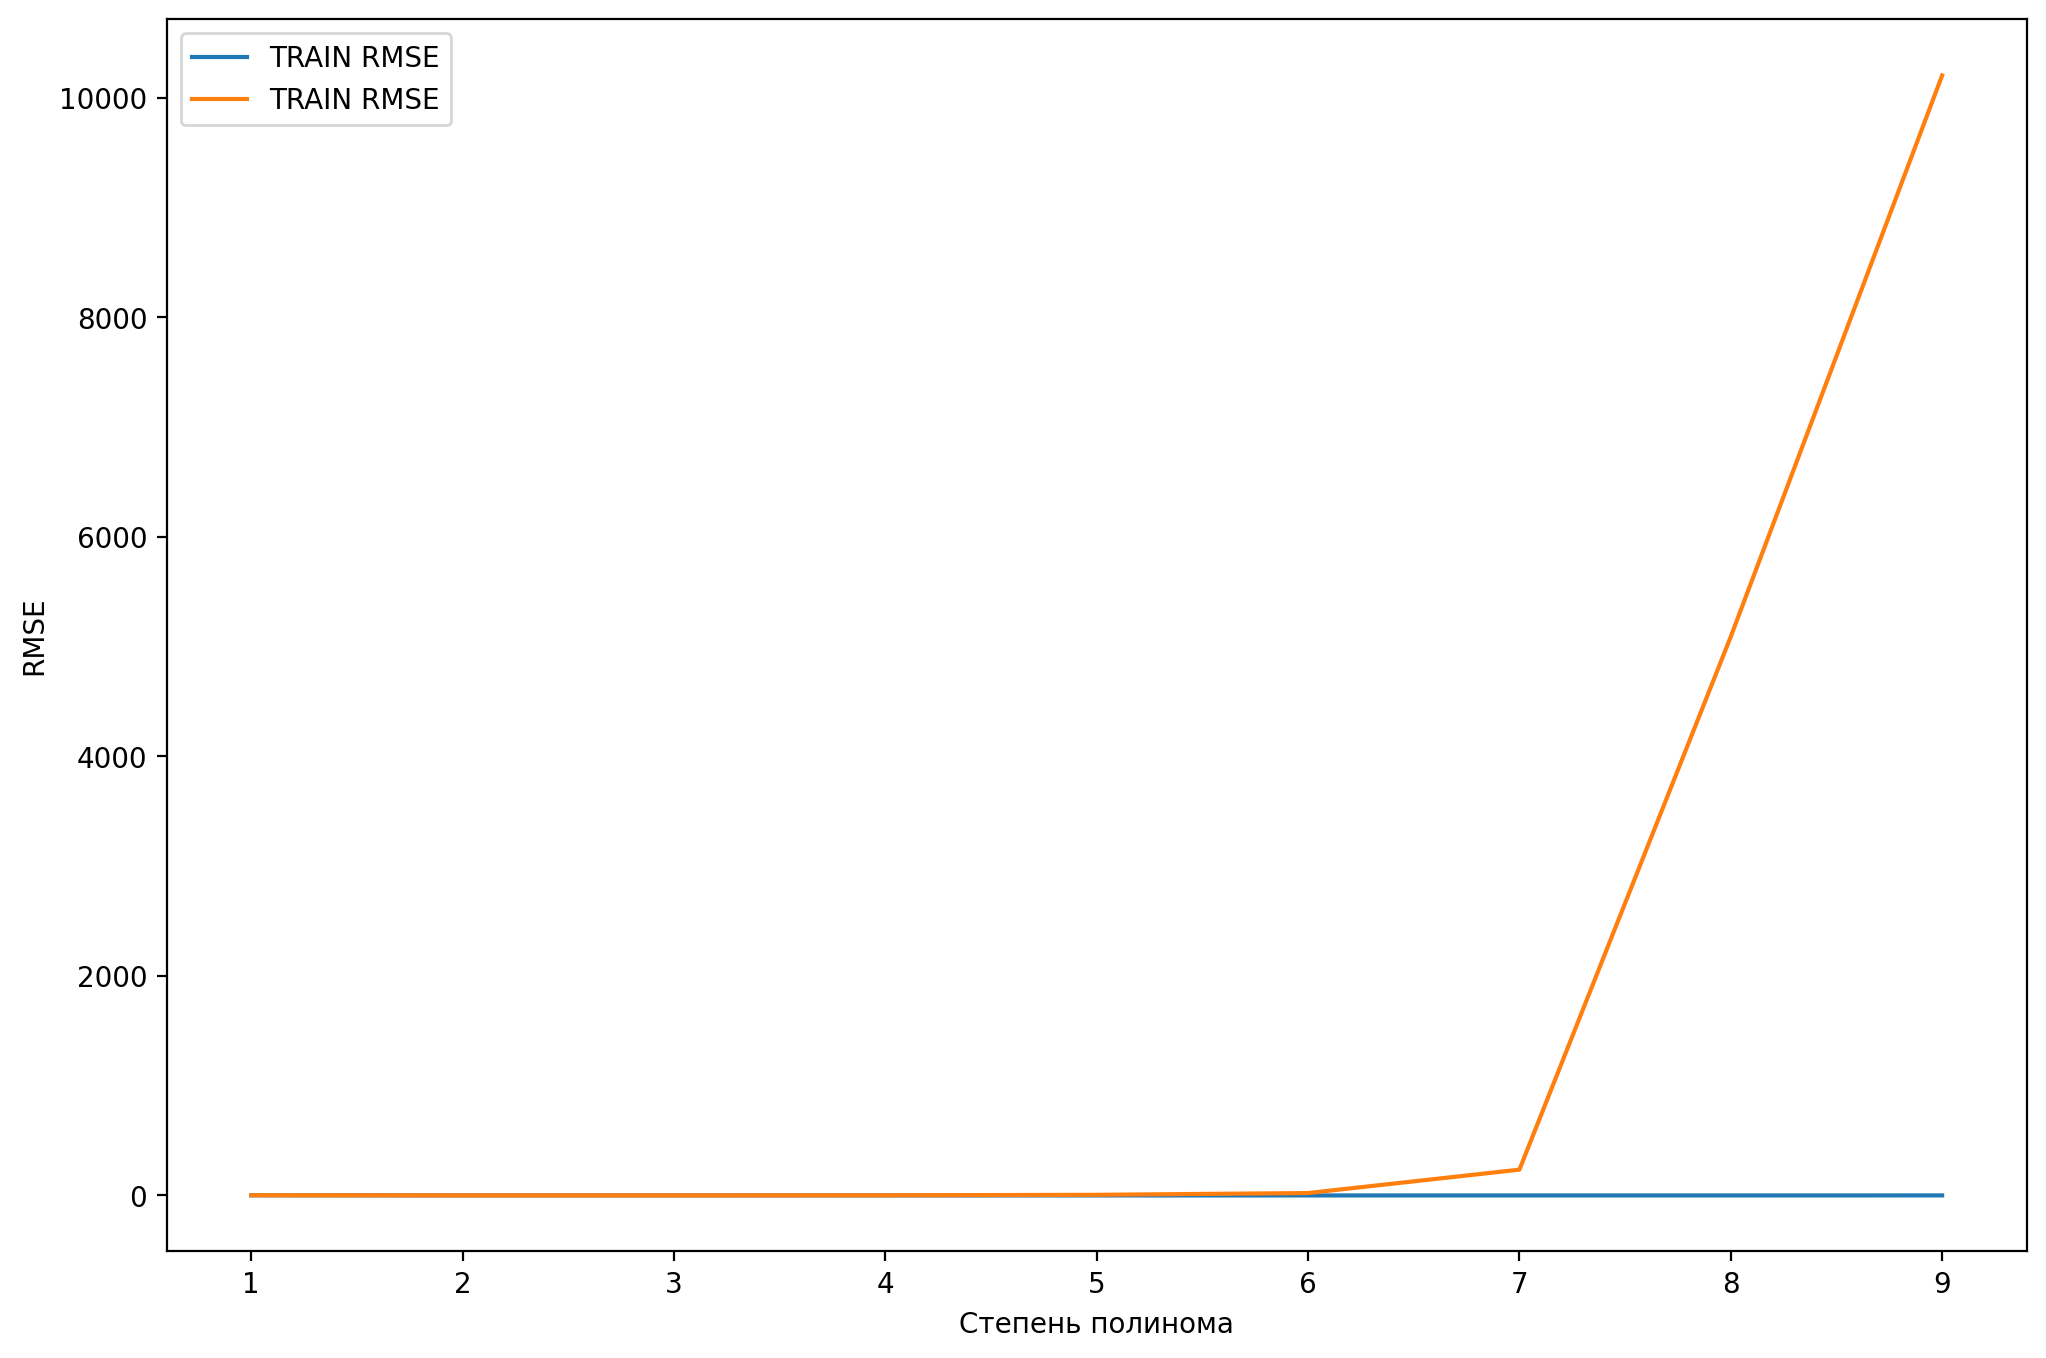

In [105]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(1, 10), train_rmse_errors, label='TRAIN RMSE')
plt.plot(range(1, 10), test_rmse_errors, label='TRAIN RMSE')
plt.xlabel('Степень полинома')
plt.ylabel('RMSE')
plt.legend()
plt.show()

---

# Финальный выбор модели
---
В случае полиномиальной регрессии - нам нужно сохранить 2 вещи: 
1) Объект создания полиномиальных признаков
2) Саму модель

Дальнейшие шаги будут следующие:
1) Выбираем финальные значения параметров на основе тестовых метрик
2) Выполняем повторное обучение на всех данных
3) Сохраняем объект Polynomial Converter
4) Сохраняем модель

На нашем графике видно, что мы могли бы выбрать между значениями degree=2 и degree=3.

In [110]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [112]:
final_model = LinearRegression()

In [114]:
# Для финальной модели предполагается что нас полностью устраивают
# её результаты, поэтому обучаем на всем наборе данных
full_converted_X = final_poly_converter.fit_transform(X)

final_model.fit(full_converted_X, y)

LinearRegression()

## Сохраняем модель и объект converter

In [117]:
from joblib import dump, load

In [119]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [121]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

## Внедрение модели и предсказания
### Предсказания на новых данных
Нам нужно сконвертировать новые входящие данные в полиномиальные данные, поскольку именно на таких данных была обучена модель. Можно загрузить ранее сохранённый объект converter и просто вызвать метод .transform() на новых данных, поскольку не нужно выполнять обучение на новых данных.

В следующей рекламной кампании мы планируем потратить 149k на рекламу на ТВ, 22k на рекламу по радио и 12k на рекламу в газетах. Сколько единиц товара мы ожидаем продать в результате такой рекламы?

In [124]:
loaded_converter = load('final_converter.joblib')

In [126]:
loaded_model = load('final_poly_model.joblib')

In [128]:
campaign = [[149, 22, 12]]

In [132]:
df_campaign = pd.DataFrame(campaign, columns=['TV', 'radio', 'newspaper'])

In [138]:
campaign_poly = loaded_converter.transform(df_campaign)
campaign_poly

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [136]:
loaded_converter.transform(df_campaign).shape

(1, 19)

In [140]:
loaded_model.predict(campaign_poly)

array([14.64501014])

---